# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [61]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [62]:
athletes = pd.read_csv("athletes.csv")

In [63]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [64]:
# Sua análise começa aqui.
athletes.head(6)
athletes.dropna(inplace=True, subset=["height"])
athletes.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              0
height           0
weight         350
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [65]:
_sample_height = get_sample(athletes, ["height"], 3000)  
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.120800e+04,11208.000000,10858.000000,11208.000000,11208.000000,11208.000000
mean,4.999777e+08,1.766282,72.070915,0.059154,0.057816,0.062099
std,2.909163e+08,0.112719,16.162358,0.259001,0.240930,0.245378
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450723e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,4.996176e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.538453e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [66]:
def q1():
    # Retorne aqui o resultado da questão 1.  
    return sct.shapiro(_sample_height)[1] > 0.05

q1()

False

In [67]:
sct.shapiro(_sample_height)[1]

5.681722541339695e-07

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

Não, o resultado me aponta rejeição ao ser uma distrubuição normal, enquanto só visualmente por histograma é possível se deixar ser enganado como uma distrubuição normal.

* Plote o qq-plot para essa variável e a analise.

O qq-plot ja trouxe um resultado claro que é falho da minha variavel ser uma distrubuição normal idem ao 
resultado, e por curiosidade o qq-plot da população aponta ela como uma distrubuição normal.

* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

Não existe nível de significância razoável para o p-value da amostra 5.049732408224372e-06, entretanto, parece que reduzindo a quantidade de elementos na amostra tende a aumenta o p-value e o efeito reverso aumentando o numero de elementos na amostra, sendo assim uma abordagem seria reduzir a quantidade de elementos da amostra, isso nos alerta a cautelar que tem que ser levada com a quantidade medida no p-value.

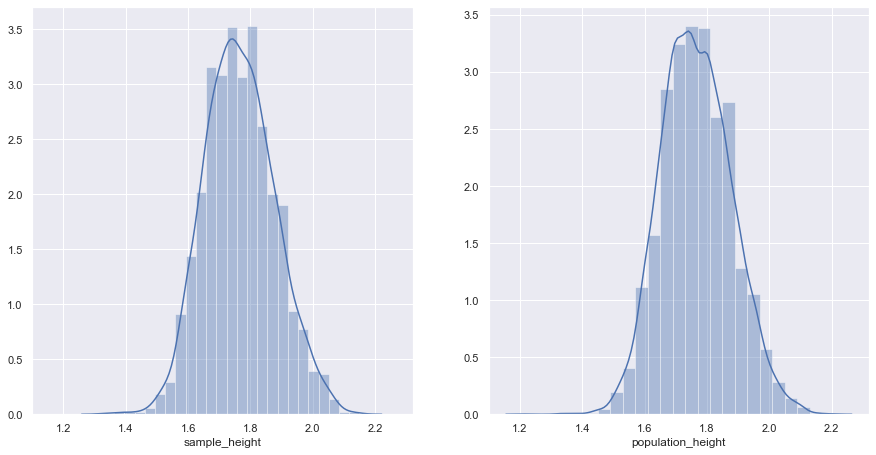

In [68]:
#histogram plot
infos, grid_plot = plt.subplots(1, 2, figsize=(15, 7.5), sharex=True)
sns_sample_height = sns.distplot(_sample_height, bins=25, ax=grid_plot[0], axlabel="sample_height")
sns_population_height = sns.distplot(athletes["height"], bins=25, ax=grid_plot[1], axlabel="population_height")

In [69]:
print(f"""
    hacking p-value:
    
    pegando as 100 primeira parte da população = {sct.shapiro(athletes["height"][0:100])[1] > 0.05}
    pegando as 50 primeira parte da amostra = {sct.shapiro(_sample_height[0:50])[1] > 0.05}
    """
     )


    hacking p-value:
    
    pegando as 100 primeira parte da população = True
    pegando as 50 primeira parte da amostra = True
    


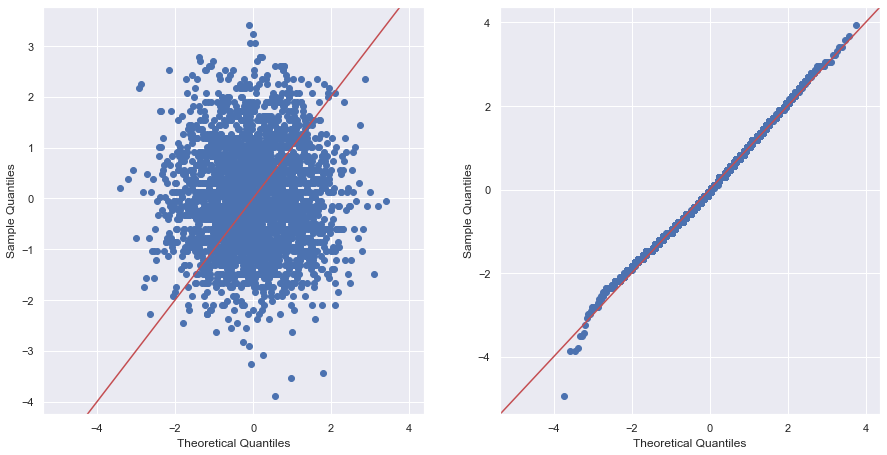

In [70]:
#Q-Qplot
infos, grid_plot = plt.subplots(1, 2, figsize=(15, 7.5), sharex=True)
sm_sample_height = sm.qqplot(_sample_height, line="45", fit=True, ax=grid_plot[0])
sm_population_height = sm.qqplot(athletes["height"], line="45", fit=True, ax=grid_plot[1])

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [71]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return bool(sct.jarque_bera(_sample_height)[1] > 0.05)
    
q2()

False

In [72]:
print(f"""
    jarque_bera sample = {sct.jarque_bera(_sample_height)[1]}
    kurtosis sample = {_sample_height.kurtosis().height}
    skewness sample = {_sample_height.skew().height}

    jarque_bera population = {sct.jarque_bera(athletes["height"])[1]}
    kurtosis population = {athletes["height"].kurtosis()}
    skewness population = {athletes["height"].skew()}
      """
      )


    jarque_bera sample = 0.001478366424594868
    kurtosis sample = -0.04487456446662286
    skewness sample = 0.15982888594665348

    jarque_bera population = 1.0204059819329814e-12
    kurtosis population = -0.025342036211863483
    skewness population = 0.17147163510663518
      


__Para refletir__:

* Esse resultado faz sentido?

Sim, em base ao nível de curtose e assimetria da amostra, sendo esses o ponto de medida do teste de jarque_bera.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [73]:
_sample_weight = get_sample(athletes, "weight", 3000).dropna()

def q3():
    # Retorne aqui o resultado da questão 3.
    return bool(sct.stats.normaltest(_sample_weight)[1] > 0.05)

q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

Sim, da para se notar uma leve concetração dos dados a esquerda fazendo uma cauda para a direita.
* Um _box plot_ também poderia ajudar a entender a resposta.

Sim, fazendo uso de 2 boxplot um sendo o atual e outro o esperado de uma distruibuição normal com os mesmos dados, fica mais fácil de ver o resultado e diferenças.


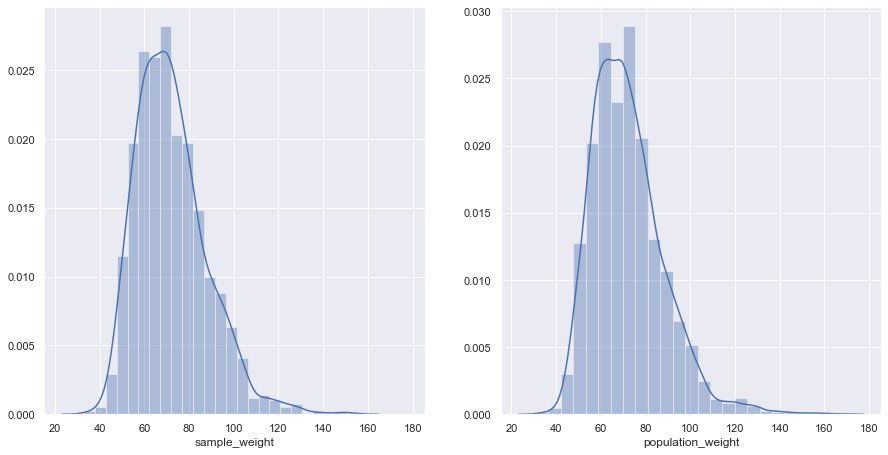

In [74]:
#histogram plot
infos, grid_plot = plt.subplots(1, 2, figsize=(15, 7.5), sharex=True)
sns_sample_weight = sns.distplot(_sample_weight, bins=25, ax=grid_plot[0], axlabel="sample_weight")
sns_population_weight = sns.distplot(athletes["weight"].dropna(), bins=25, ax=grid_plot[1], axlabel="population_weight")

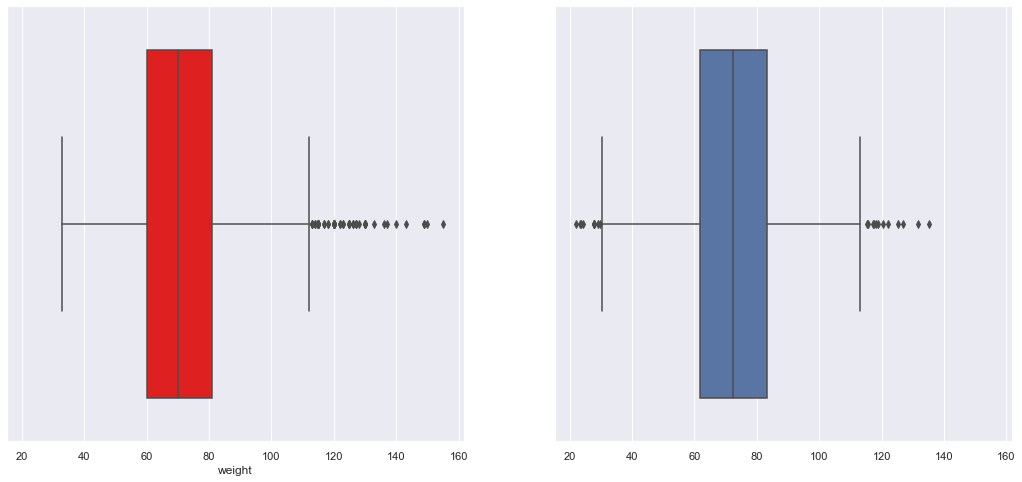

In [75]:
#boxplot
infos, grid_plot = plt.subplots(1, 2, figsize=(18, 8), sharex=True)
boxplot_sample_weight = sns.boxplot(_sample_weight, color="red", ax=grid_plot[0])
boxplot_random_normal = sns.boxplot(sct.norm.rvs(loc=_sample_weight.mean(), scale=_sample_weight.std(), size = _sample_height.shape[0], random_state=True), ax=grid_plot[1])

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [76]:
_sample_weight_log = np.log(_sample_weight)

def q4():
    # Retorne aqui o resultado da questão 4.
    return bool(sct.stats.normaltest(_sample_weight_log)[1] > 0.05)

q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

* Você esperava um resultado diferente agora?

4.25664871214529


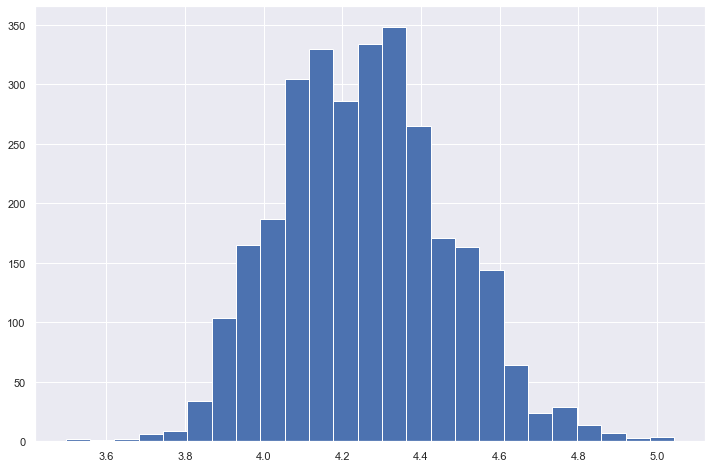

In [77]:
#histogram plot
print(_sample_weight_log.mean())
_sample_weight_log.hist(bins=25)

In [78]:
print(f"""
    normaltest em sample_weight = {sct.stats.normaltest(_sample_weight)[1]} 
    normaltest em sample_weight_log = {sct.stats.normaltest(_sample_weight_log)[1]} 
    """
     )


    normaltest em sample_weight = 1.9712736919456068e-88 
    normaltest em sample_weight_log = 1.1614636606447438e-06 
    


> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [79]:
bra = athletes[athletes["nationality"] == "BRA"]["height"]
usa = athletes[athletes["nationality"] == "USA"]["height"]
can = athletes[athletes["nationality"] == "CAN"]["height"]

print(f"bra_na = {bra.isna().sum()}\t usa_na = {usa.isna().sum()}\t can_na = {can.isna().sum()}")

bra_na = 0	 usa_na = 0	 can_na = 0


In [80]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return bool(sct.stats.ttest_ind(bra, usa, nan_policy="omit", equal_var=False)[1] > 0.05)

q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [81]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return bool(sct.stats.ttest_ind(bra, can, nan_policy="omit", equal_var=False)[1] > 0.05)

q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [82]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return float(sct.stats.ttest_ind(usa, can, nan_policy="omit", equal_var=False)[1].round(8))

q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

In [83]:
print(f"""
    Student's Test(T Test)
    bra <-> usa = {sct.stats.ttest_ind(bra, usa, nan_policy="omit", equal_var=False)}
    bra <-> can = {sct.stats.ttest_ind(bra, can, nan_policy="omit", equal_var=False)}
    usa <-> can = {sct.stats.ttest_ind(usa, can, nan_policy="omit", equal_var=False)}
    """
     )


    Student's Test(T Test)
    bra <-> usa = Ttest_indResult(statistic=-3.2232436467501553, pvalue=0.0013080041830144061)
    bra <-> can = Ttest_indResult(statistic=0.638930491436537, pvalue=0.5230827295443041)
    usa <-> can = Ttest_indResult(statistic=3.516987632488539, pvalue=0.00046601293473888875)
    


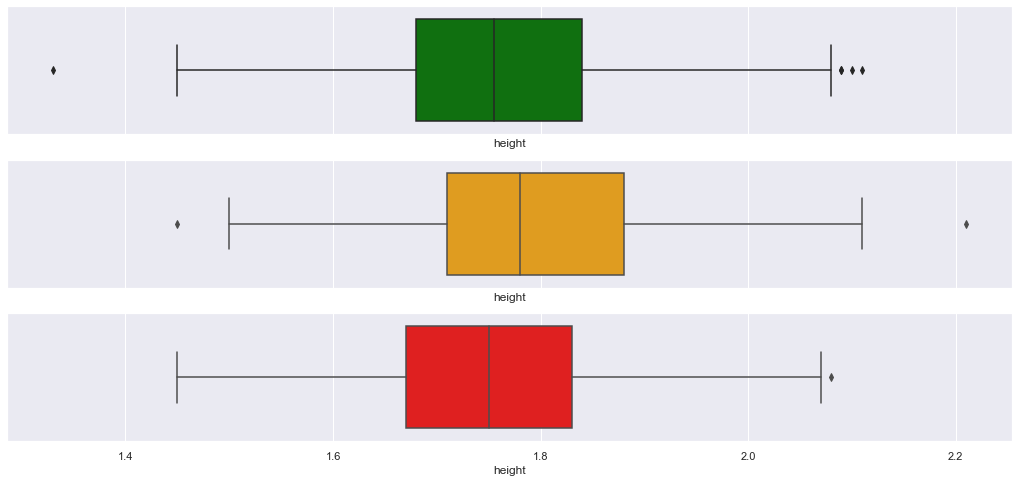

In [91]:
#boxplot
infos, grid_plot = plt.subplots(3, 1, figsize=(18, 8), sharex=True)
boxplot_bra = sns.boxplot(bra, color="green", ax=grid_plot[0])
boxplot_usa = sns.boxplot(usa, color="orange", ax=grid_plot[1])
boxplot_can = sns.boxplot(can, color="red", ax=grid_plot[2])